In [8]:
# Load packages ----
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from IPython.display import HTML
from IPython.display import Markdown as md
from IPython.core.display import HTML as Center
from config import marker, qof_measure_marker, start_date, end_date, demographics, codelist_path
from IPython.display import Image, display
import base64

from utilities import *
%matplotlib inline


# Changes and variation in QOF asthma register
## Indicator: AST005 (Version: 46.0)
## Timeframe: 2019-09-01 and 2022-03-31

# Content

<ul id="docNav">

<li> <a href="#what">What it is</a>
<li> <a href="#why">Why it matters</a>
<li> <a href="#business_rules">Business rules</a>
    <ul>
        <li> <a href="#business_rules_ast005">Indicator AST005</a>
    </ul>
<li> <a href="#methods">Methods</a>
<li> <a href="#results">Results</a>
    <ul>
        <li> <a href="#results_ast005">Indicator AST005</a>
             <ul>
                 <li> <a href="#results_ast005_total">Total</a>
                 <li> <a href="#results_ast005_var_gp">Variation across GP practices</a>
                 <li> <a href="#results_ast005_by_sex">Breakdown by 'sex'</a>
                 <li> <a href="#results_ast005_by_age_band">Breakdown by 'age_band'</a>
                 <li> <a href="#results_ast005_by_region">Breakdown by 'region'</a>
                 <li> <a href="#results_ast005_by_imd">Breakdown by 'imd'</a>
                 <li> <a href="#results_ast005_by_ethnicity">Breakdown by 'ethnicity'</a>
                 <li> <a href="#results_ast005_by_learning_disability">Breakdown by 'learning_disability'</a>
                 <li> <a href="#results_ast005_by_care_home_status">Breakdown by 'care_home_status'</a>
            </ul>
    </ul>
<li> <a href="#discussion">Discussion</a>
<li> <a href="#references">References</a>

</ul>

<a id="what"></a>
# What it is 

The [Quality and Outcomes Framework (QOF)](https://digital.nhs.uk/data-and-information/data-tools-and-services/data-services/general-practice-data-hub/quality-outcomes-framework-qof) outlines one indicator that focuses on asthma (AST005). 
We aim to use OpenSAFELY to quantify the extent to which this indicator was disrupted during the pandemic.

<a id="why"></a>
# Why it matters

General practice has been disrupted by the pandemic in many clinical areas (e.g., [Curtis et al., 2021](https://bjgp.org/content/72/714/e63); [Williamson et al., 2020](https://www.nature.com/articles/s41586-020-2521-4)), and variation in delivery of asthma care during the first wave of the pandemic has been reported previously ([Curtis et al, 2022](https://bjgp.org/content/72/714/e63)).
We aim to assess the extent to which the COVID-19 pandemic has impacted the service delivery and clinical outcomes of asthma care. 

<a id="business_rules"></a>

# Business rules

The denominator and numerator rules for AST005 (Version: 46.0) are outlined below.
More details about the rules can be found [here](https://digital.nhs.uk/data-and-information/data-collections-and-data-sets/data-collections/quality-and-outcomes-framework-qof/quality-and-outcome-framework-qof-business-rules/qof-business-rules-v46.0-2021-2022-baseline-release).
Dashboards presenting the annual targets of all QOF indicators published by NHSD are available [here](https://digital.nhs.uk/data-and-information/data-tools-and-services/data-services/general-practice-data-hub/quality-outcomes-framework-qof).

<a id="business_rules_ast005"></a>

## Indicator AST005
 **Asthma Register:** Patients aged at least 6 years old with an unresolved asthma diagnosis and have received asthma-related drug treatment in the preceding 12 months, up to the end of the month of reporting

<a id="AST_REG"></a>

| Rule number | Rule | Action if true | Action if false | Rule description or comments |
|:---|:---|:---|:---|:---| 
| 1 | If `ASTLAT_DAT` <> NULL AND if `ASTTRT_DAT` <> NULL | Next rule | Reject | Pass to the next rule all patients from the specified population who meet both the criteria below: i) Have an asthma diagnosis before the achievement date, ii) Had asthma-related drug treatment in the 12 months up to and including the achievement date. Reject the remaining patients. |
| 2 | If `ASTRES_DAT` = NULL | Next rule | Reject | Pass to the next rule all patients passed to this rule who have no asthma resolved code since the latest asthma diagnosis. Reject the remaining patients. |
| 3 | If `PAT_AGE` >= 6 years  | Select | Reject | Select patients passed to this rule who are aged 6 years or older on the achievement date. Reject the remaining patients. |

<a id="methods"></a>
# Methods

Using OpenSAFELY-TPP, covering 40% of England's population, we have assessed QOF asthma registers (Indicator: AST005) between 2019-09-01 and 2022-03-31.
The codelist used can be found here at [OpenSAFELY Codelists](https://codelists.opensafely.org/).

The **study population** for each indicator is defined by the denominator rules shown above.
For each month within the study period, we have calculated the percentage of registered Patients aged at least 6 years old with an unresolved asthma diagnosis and have received asthma-related drug treatment in the preceding 12 months, up to the end of the month of reporting.
All analytical code and output is available for inspection at the [OpenSAFELY GitHub repository](https://github.com/opensafely/blood-pressure-qof).

<a id="results"></a>
# Results

<a id="results_ast005"></a>
## Indicator AST005

### Totals number of recorded events

The table below shows the top 5 recorded events across the study period.
Note that this table currently only contains one code per patient per month.
Therefore some counts may not be accurate.
This issue will be fixed in a future update of this report.

In [9]:
child_table = pd.read_csv('../output/child_code_table.csv')
child_table

,code,Events,Events (thousands),Description
0,195977004,3.0,0.003,Mixed asthma
1,707980005,3.0,0.003,Acute severe exacerbation of moderate persiste...
2,733858005,2.0,0.002,Acute severe refractory exacerbation of asthma
3,418395004,2.0,0.002,Tea-makers' asthma
4,2360001000004109,2.0,0.002,Steroid dependent asthma


In [10]:
codelist = pd.read_csv(f'../{codelist_path}')

image_paths = {d: f'../output/plot_{d}.png' for d in demographics}
image_paths['total'] = '../output/plot_total.png'

<a id="results_ast005_total"></a>

### Patients aged at least 6 years old with an unresolved asthma diagnosis and have received asthma-related drug treatment in the preceding 12 months, up to the end of the reporting period.

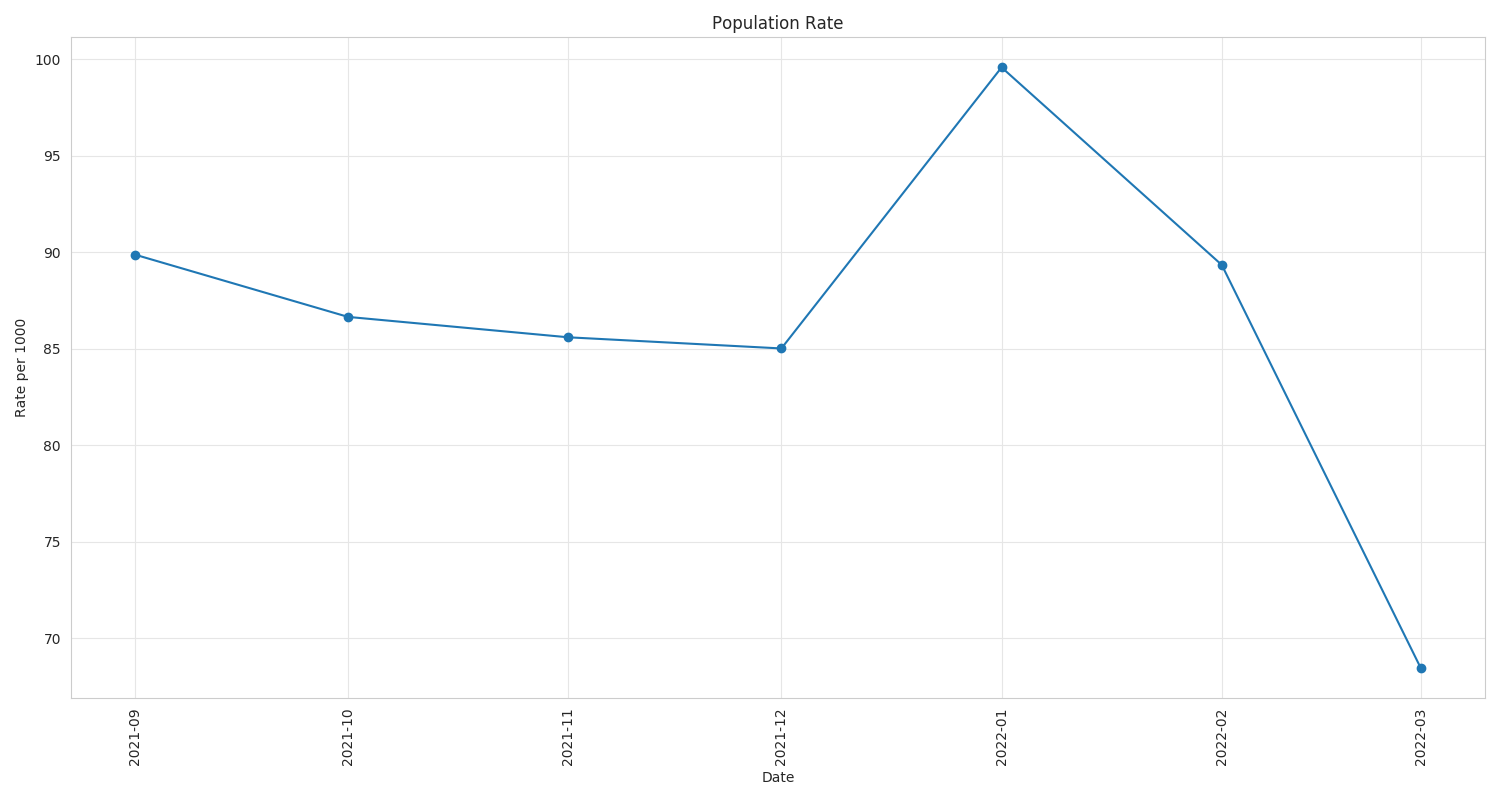

In [11]:
Image(filename=image_paths['total'])

<a id="results_ast005_var_gp"></a>
### Total Number by GP Practice

In [5]:
practice_table = pd.read_csv('../output/rate_table_practice.csv', parse_dates=['date']).sort_values(by='date')
percentage_practices = get_percentage_practices(practice_table)
md(f"Percentage of practices with a recording of a code within the codelist during the study period: {percentage_practices}%")

Percentage of practices with a recording of a code within the codelist during the study period: 95.65%

### Patients aged at least 6 years old with an unresolved asthma diagnosis and have received asthma-related drug treatment in the preceding 12 months, up to the end of the reporting period.

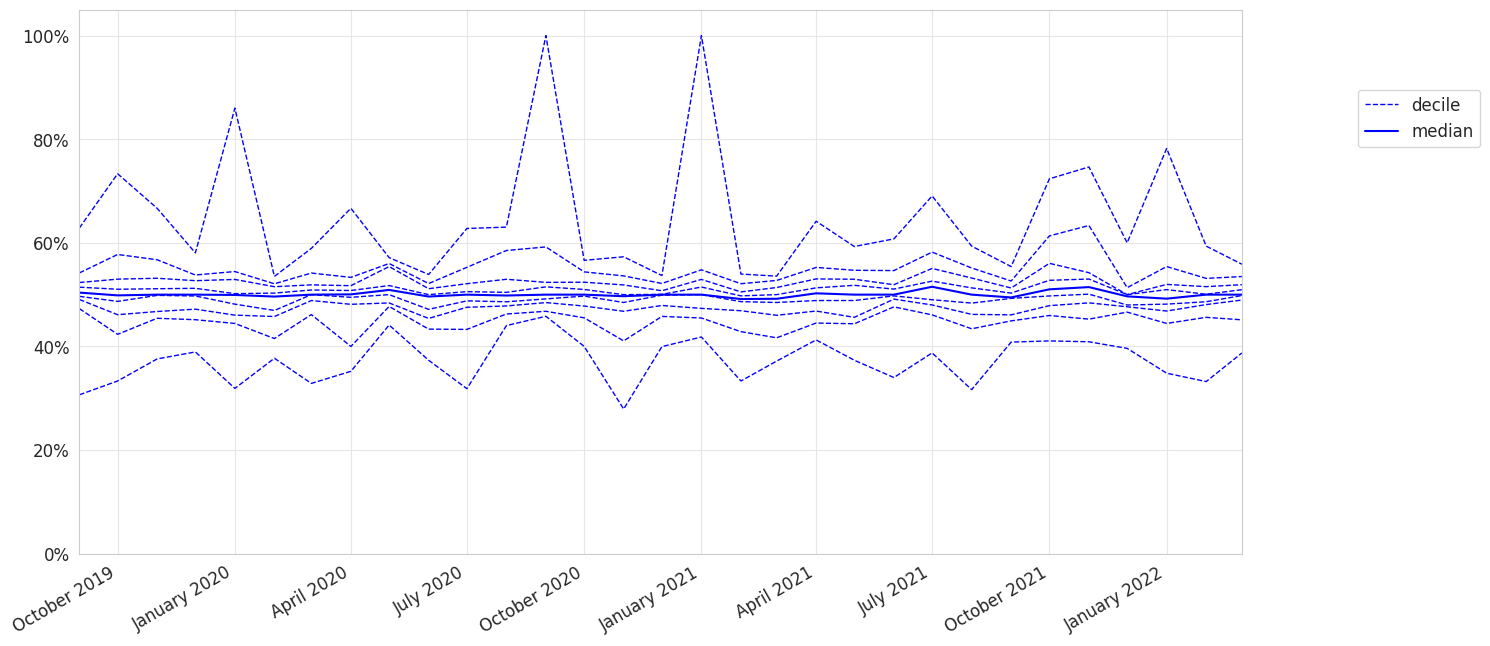

In [6]:
Image(filename='../output/decile_chart.png')

<a id="results_ast005_by_sex"></a>
### Breakdown of AST005 by sex

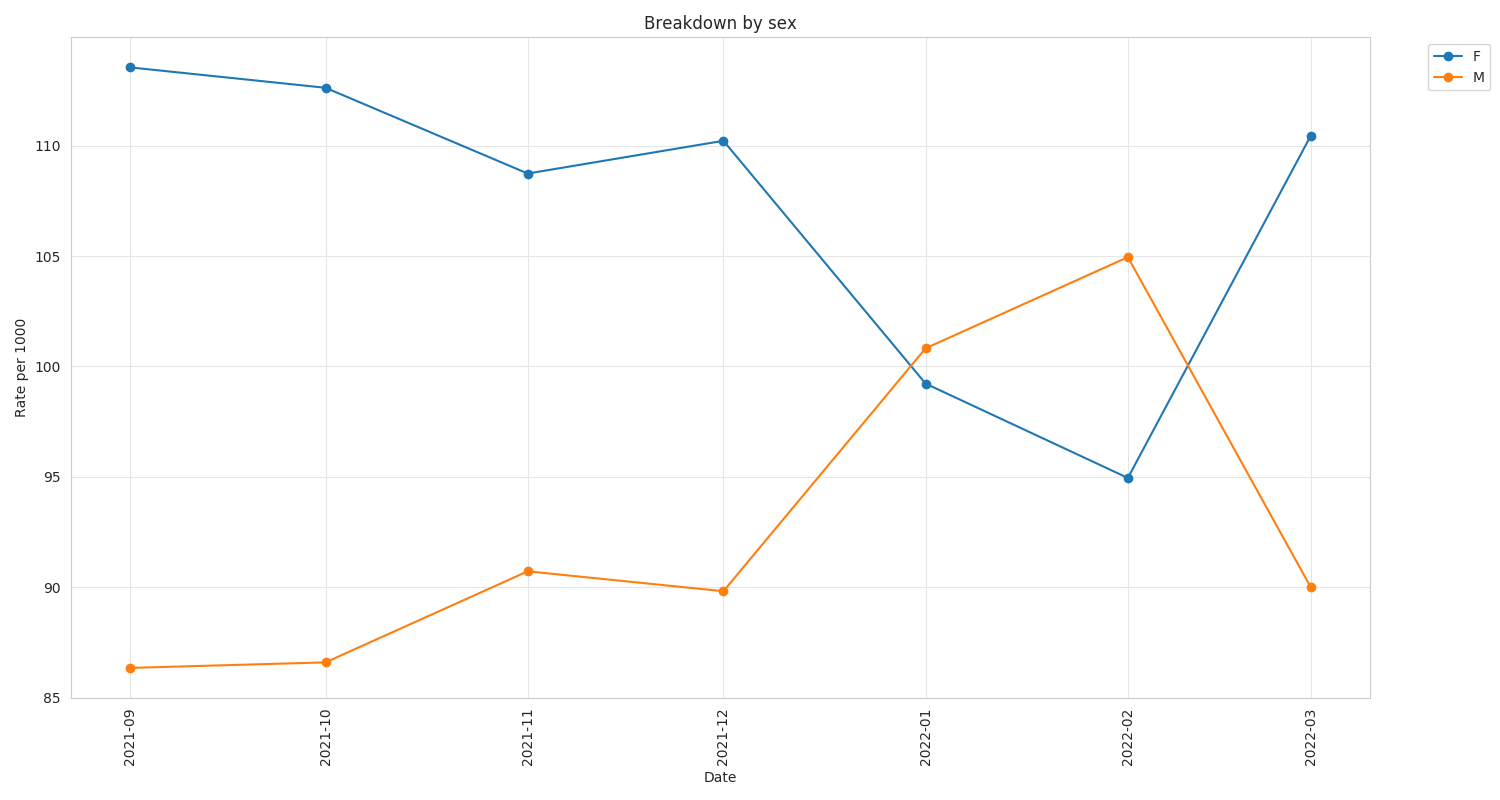

In [12]:
Image(filename=image_paths[demographics[0]])

<a id="results_ast005_by_age_band"></a>
### Breakdown of AST005 by age band

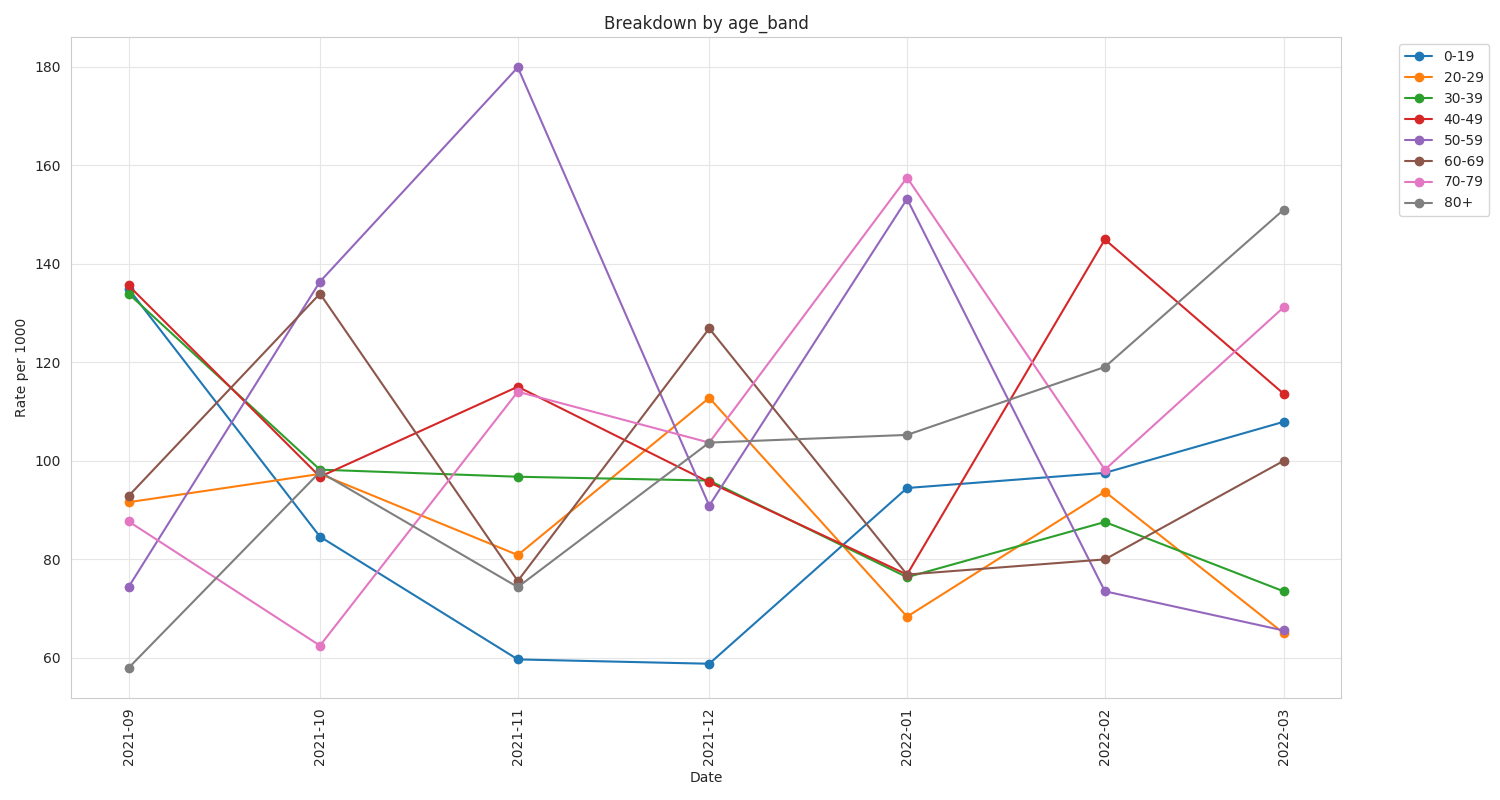

In [13]:
Image(filename=image_paths[demographics[1]])

<a id="results_ast005_by_region"></a>

### Breakdown of AST005 by region

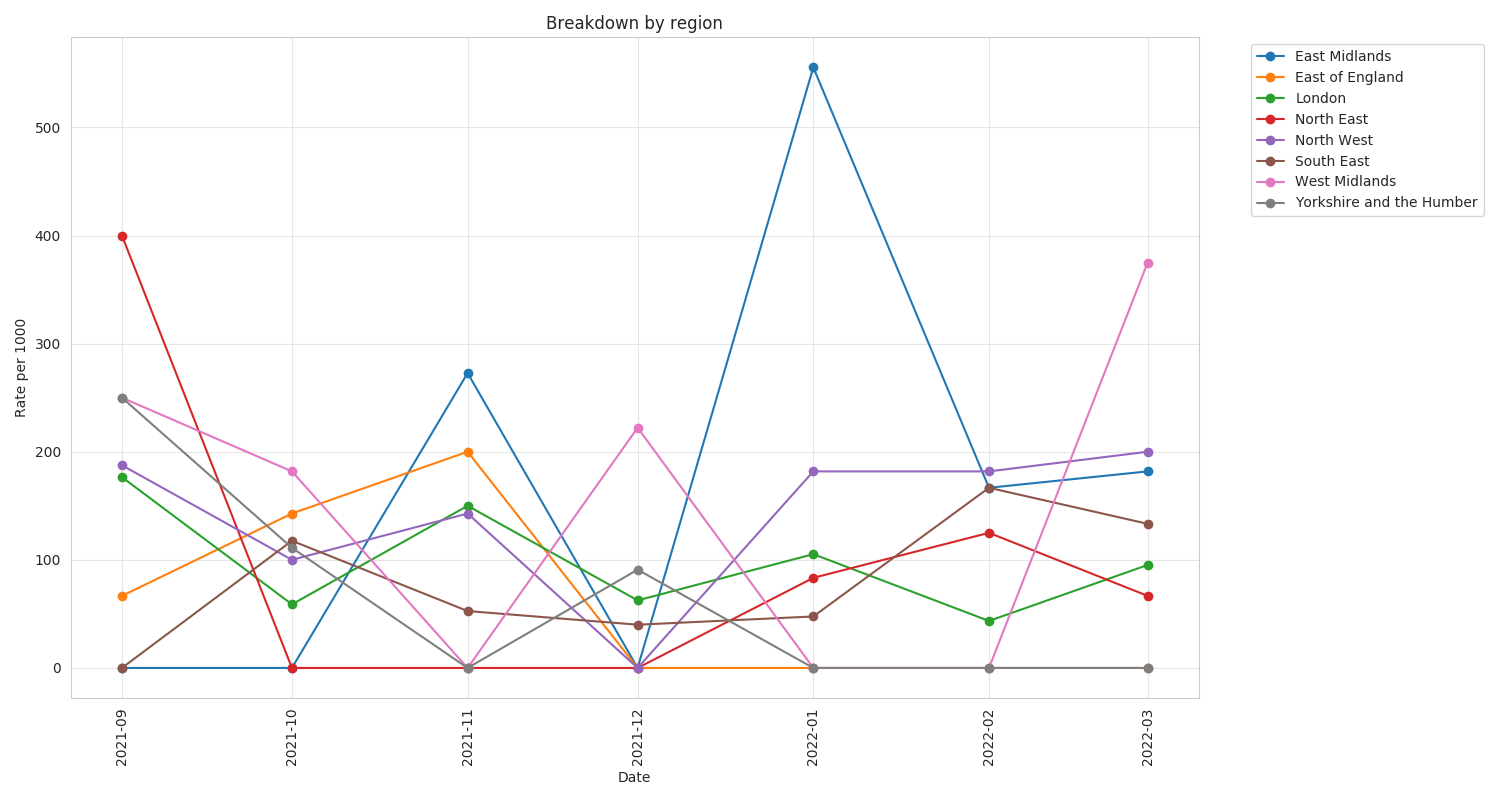

In [14]:
Image(filename=image_paths[demographics[2]])

<a id="results_ast005_by_imd"></a>

### Breakdown of AST005 by IMD quintile

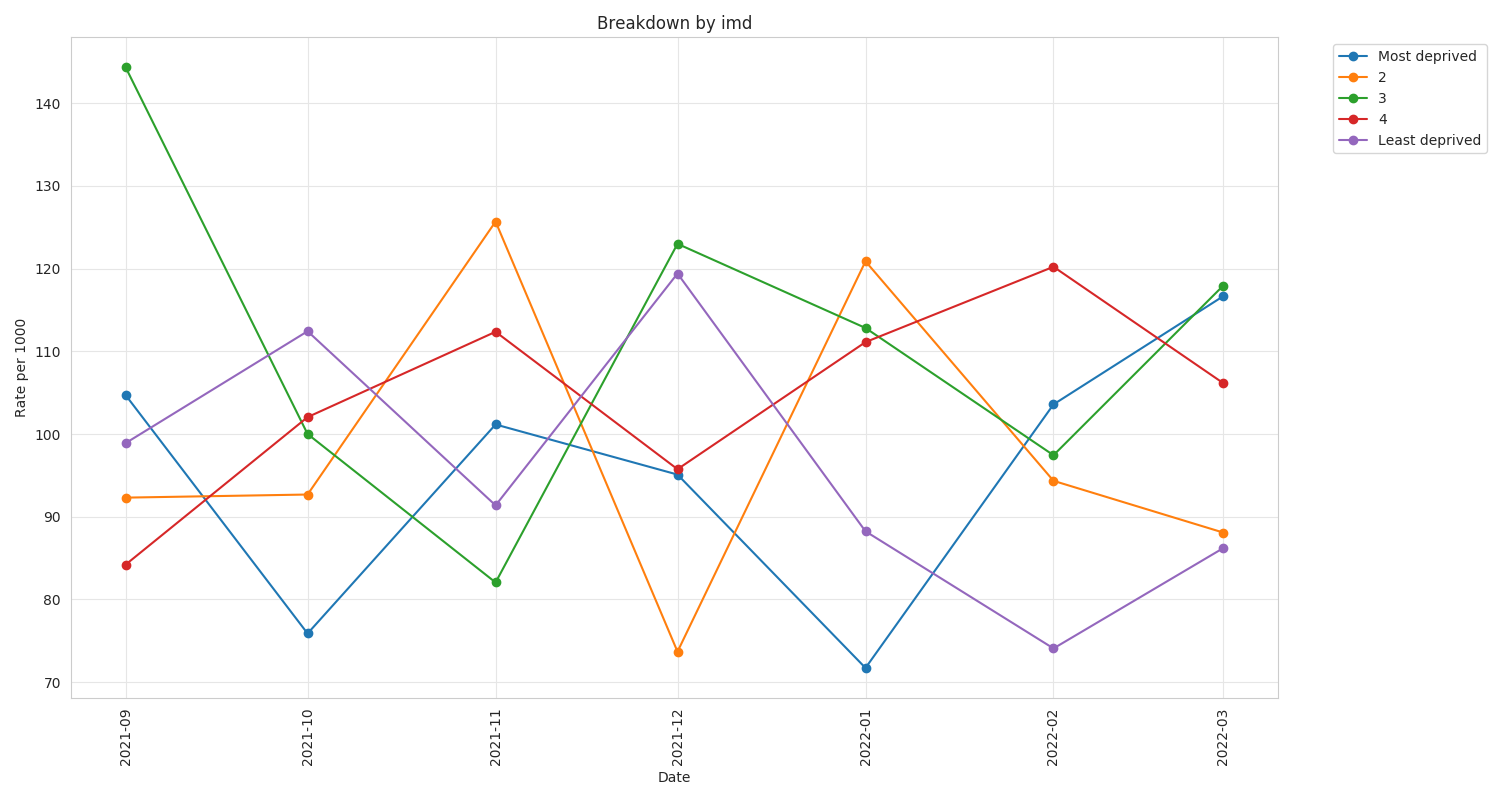

In [15]:
Image(filename=image_paths[demographics[3]])

<a id="results_ast005_by_ethnicity"></a>

### Breakdown of AST005 by ethnicity

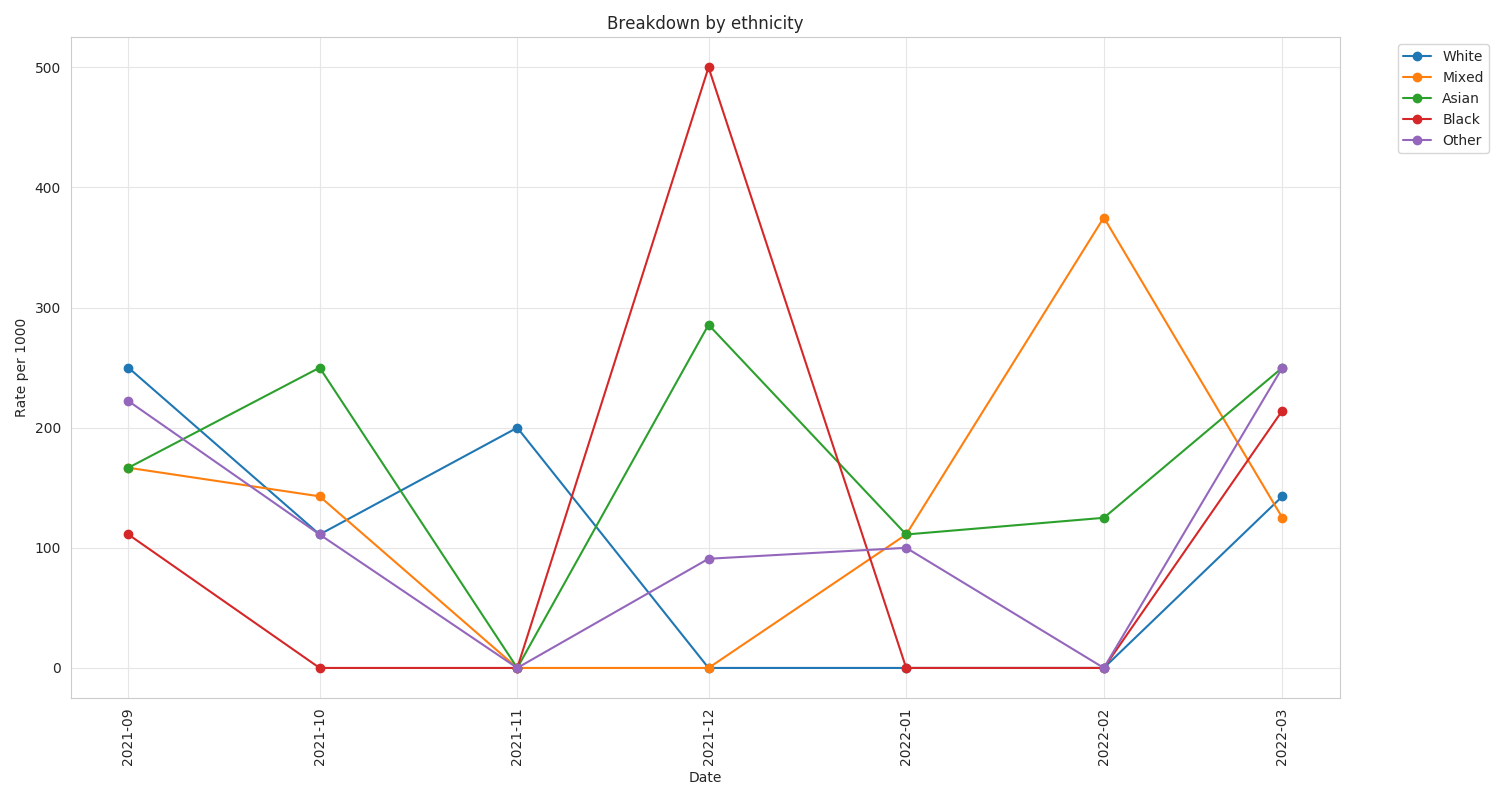

In [16]:
Image(filename=image_paths[demographics[4]])

<a id="results_ast005_by_learning_disability"></a>

### Breakdown of AST005 by learning disability record status

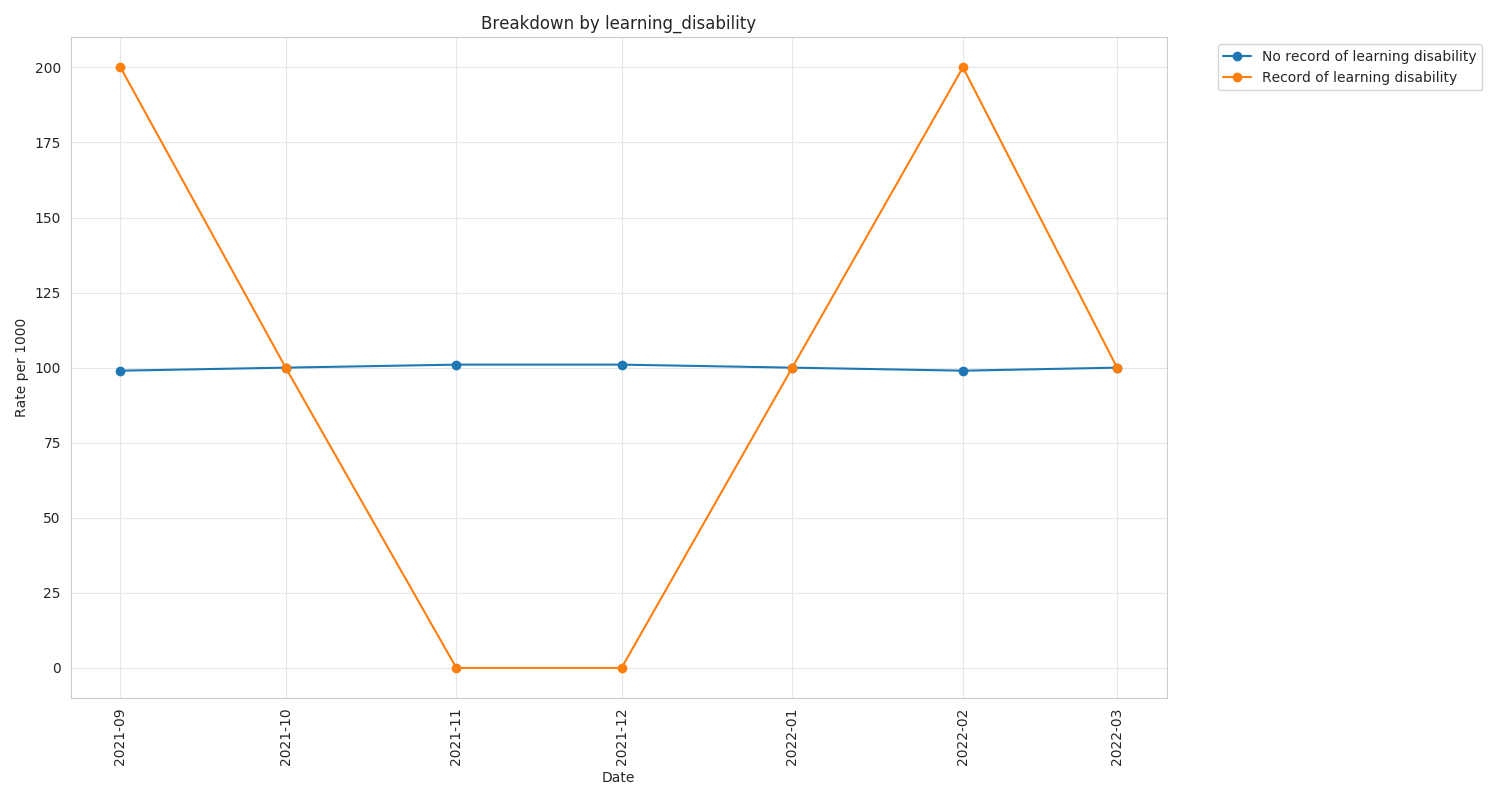

In [17]:
display(Image(filename=image_paths[demographics[5]]))

<a id="results_ast005_by_care_home_status"></a>

### Breakdown of AST005 by care home status

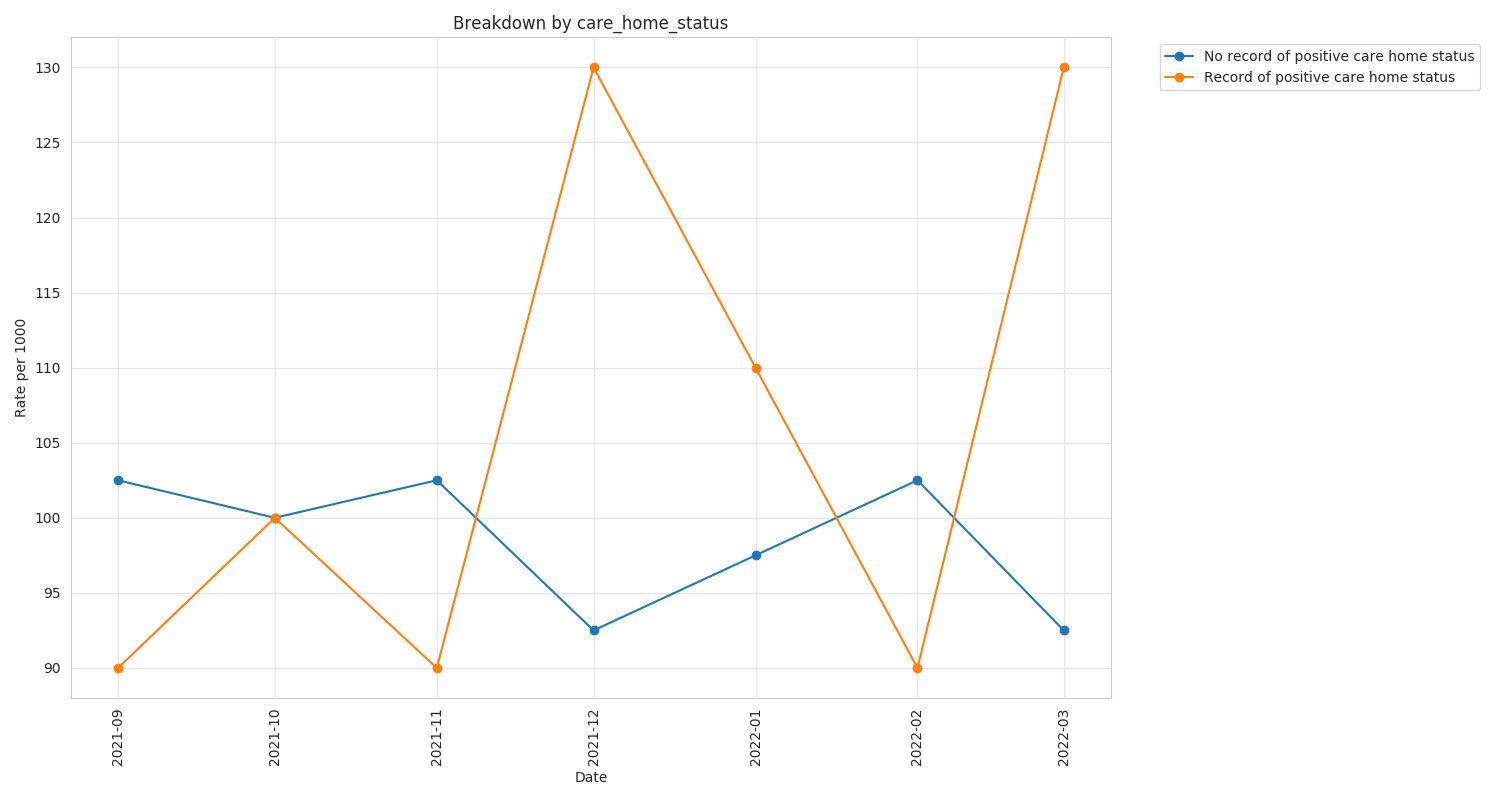

In [18]:
Image(filename=image_paths[demographics[6]]) 

<a id="references"></a>
# References 

1. Curtis HJ, MacKenna B, Croker R, Inglesby P, Walker AJ, Morley J, et al. OpenSAFELY NHS Service Restoration Observatory 1: describing trends and variation in primary care clinical activity for 23.3 million patients in England during the first wave of COVID-19. Br J Gen Pract [Internet]. 2021 Sep 20 [cited 2021 Oct 5]; Available from: https://bjgp.org/content/early/2021/09/24/BJGP.2021.0380
1. Williamson EJ, Walker AJ, Bhaskaran K, Bacon S, Bates C, Morton CE, et al. Factors associated with COVID-19-related death using OpenSAFELY. Nature. 2020 Aug;584(7821):430–6. https://www.nature.com/articles/s41586-020-2521-4
1. Curtis HJ, MacKenna B, Croker R, Inglesby P, Walker AJ, Morley J, et al. OpenSAFELY NHS Service Restoration Observatory 1: describing trends and variation in primary care clinical activity for 23.3 million patients in England during the first wave of COVID-19. Br J Gen Pract [Internet]. 2022;72(714):e63-e74. Available from: https://bjgp.org/content/72/714/e63

